In [1]:
#Importing necessary liberaries for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Checking for class imbalance**

The 2022 Kaggle Survey captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our `salaries` DataFrame, you can see the following proportion of job categories in the Kaggle survey:

Job Category |	Relative Frequency
--- | ---
Data Science |	0.281236
Data Analytics | 	0.224231
Other  |	0.214609
Managerial |	0.121300
Machine Learning |	0.083248
Data Engineering |	0.075375

Thinking of the Kaggle survey results as the population, your task is to find out whether the `salaries` DataFrame is representative by comparing the relative frequency of job categories. The salaries DataFrame is loaded for you in the first part of the codecell below.

**Instructions:**
* Print the relative frequency of the `"Job_Category"` column from `salaries` DataFrame.


In [3]:
#Loading the salaries DataFrame from the dataset file
salaries = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/salaries.csv?raw=True', parse_dates=["date_of_response"])

# Print the relative frequency of Job_Category
print(salaries.dtypes)
# Print the relative frequency of Job_Category
relative_frequency = salaries['Job_Category'].value_counts(normalize=True)
print(relative_frequency)


Unnamed: 0                       int64
Designation                     object
date_of_response        datetime64[ns]
Experience                      object
Employment_Status               object
Salary_In_Rupees               float64
Employee_Location               object
Company_Location                object
Company_Size                    object
Remote_Working_Ratio           float64
Salary_USD                     float64
Job_Category                    object
dtype: object
Job_Category
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other               0.068796
Managerial          0.034398
Name: proportion, dtype: float64


In [4]:
#1. Cross-tabulate Company_Size and Experience
# Cross-tabulation between "Company_Size" and "Experience"
company_size_experience_ct = pd.crosstab(index=salaries["Company_Size"],
                                         columns=salaries["Experience"])


#2. Cross-tabulate Job_Category and Company_Size
job_category_company_size_ct = pd.crosstab(index=salaries["Job_Category"],
                                           columns=salaries["Company_Size"])
print(job_category_company_size_ct)


#3. Cross-tabulate Job_Category and Company_Size
mean_salary_ct = pd.crosstab(index=salaries["Company_Size"],
                             columns=salaries["Experience"],
                             values=salaries["Salary_USD"],
                             aggfunc="mean")
print(mean_salary_ct)


Company_Size       L   M   S
Job_Category                
Data Analytics    23  61   8
Data Engineering  28  72  11
Data Science      38  59  16
Machine Learning  17  19  13
Managerial         5   8   1
Other             13   9   6
Experience              EN             EX             MI             SE
Company_Size                                                           
L             74340.869500  154505.374286  101691.907592  143118.919636
M             44479.834560  159022.406667   89200.971310  129718.131794
S             63986.715333   66591.072000   49262.250857  106961.206400


# **Cross-tabulation**

Cross-tabulation can help identify how observations occur in combination.

Using the `salaries` dataset, which has been loaded previously as a pandas DataFrame, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between `"Company_Size"` and other variables.

`pandas` has been imported for you as `pd`.

Instructions:
1. Perform cross-tabulation, setting `"Company_Size"` as the index, and the columns to classes in `"Experience"`.

2. Cross-tabulate `"Job_Category"` and classes of `"Company_Size"` as column names.

3. Update `pd.crosstab()` to return the mean `"Salary_USD"` values.


# **Extracting features for correlation**

In this exercise, you'll work with a version of the `salaries` dataset containing a new column called `"date_of_response"`.

The dataset has been read in as a pandas DataFrame, with `"date_of_response"` as a datetime data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

`seaborn` has been imported for you as `sns`, `pandas` as `pd`, and `matplotlib.pyplot` as `plt`.

**Instructions:**
* Extract the month from `"date_of_response"`, storing it as a column called `"month"`.
* Create the `"weekday"` column, containing the weekday that the participants completed the survey.
* Plot a heat map, including the Pearson correlation coefficient scores.



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

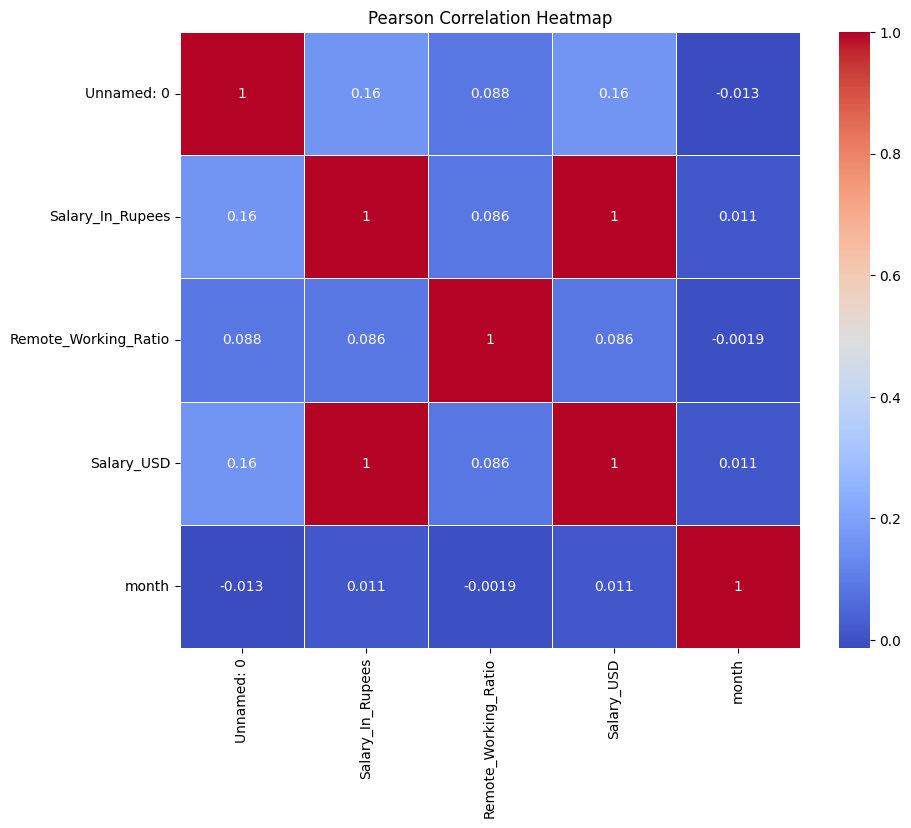

In [21]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'salaries' DataFrame is already loaded
# Step 1: Extract the month from "date_of_response" and store it as "month"
salaries['month'] = salaries['date_of_response'].dt.month

# Step 2: Create the "weekday" column from "date_of_response"
salaries['weekday'] = salaries['date_of_response'].dt.day_name()
numeric_columns = salaries.select_dtypes(include=['number'])

# Step 4: Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Step 5: Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt





# **Calculating salary percentiles**

In our class, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the `"Salary_USD"` column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

`pandas` has been imported as `pd` and the salaries dataset read in as DataFrame called `salaries` previously.

**Instructions:**
* Find the 25th percentile of `"Salary_USD"`.
* Store the median of `"Salary_USD"` as `salaries_median`.
* Get the 75th percentile of salaries.


In [6]:

# Step 1: Find the 25th percentile
salaries_25th = salaries['Salary_USD'].quantile(0.25)

# Step 2: Find the median (50th percentile)
salaries_median = salaries['Salary_USD'].median()

# Step 3: Find the 75th percentile
salaries_75th = salaries['Salary_USD'].quantile(0.75)

# Display the results
print(f"25th Percentile: {salaries_25th}")
print(f"Median (50th Percentile): {salaries_median}")
print(f"75th Percentile: {salaries_75th}")


25th Percentile: 60880.691999999995
Median (50th Percentile): 97488.552
75th Percentile: 143225.1


# **Categorizing salaries**

Now it's time to make a new category! You'll use the variables `twenty_fifth`, `salaries_median`, and `seventy_fifth`, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called `"salary_level"`, which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

`pandas` has been imported as `pd`, `matplotlib.pyplot` as `plt`, `seaborn` as `sns`, and the salaries dataset as a pandas DataFrame called `salaries`.

**Instructions:**
1. Create `salary_labels`, a list containing `"entry"`, `"mid`", `"senior"`, and `"exec"`.
2. Finish `salary_ranges`, adding the 25th percentile, median, 75th percentile, and largest value from `"Salary_USD"`.
3. Split `"Salary_USD"` based on the labels and ranges you've created.
4. Use `sns.countplot()` to visualize the count of `"Company_Size"`, factoring salary level labels.


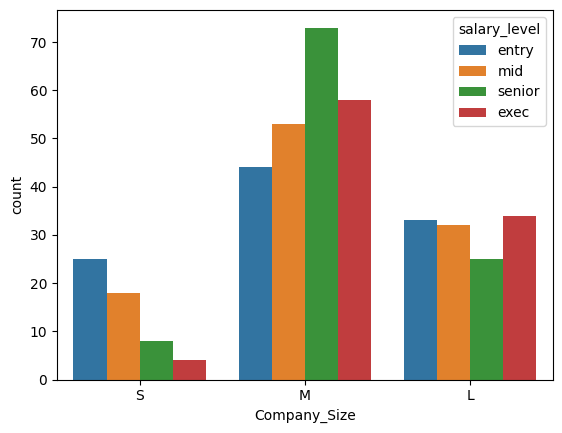

In [8]:

#1. Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

#2. Create the salary ranges list. You may use variables you calculated in the previous codecell
salary_ranges = [0, salaries_25th, salaries_median, salaries_75th, salaries["Salary_USD"].max()]

#3. Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"], bins=salary_ranges,
                                  labels=salary_labels)

#4. Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()


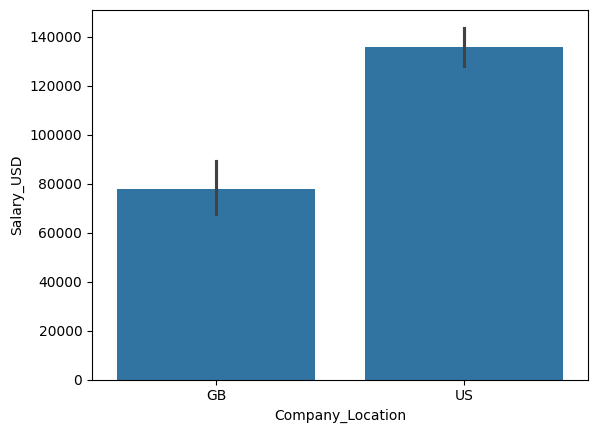

In [11]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Company_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Company_Location", y="Salary_USD")
plt.show()


# **Comparing salaries**

Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by `"Employee_Location"` and produce a plot displaying the average salary between the two groups.

The `salaries` DataFrame has been loaded previously as a pandas DataFrame.

`pandas` has been imported as `pd`, `maplotlib.pyplot` as `plt` and `seaborn` as `sns`.

**Instructions:**
* Filter salaries where "`Employee_Location"` is `"US"` or `"GB"`, saving as `usa_and_gb`.
* Use `usa_and_gb` to create a barplot visualizing `"Salary_USD"` against `"Employee_Location"`.


**Choosing a hypothesis**

You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!

In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values:

Value |	Meaning
----- | -------
CT |	Contractor
FL |	Freelance
PT |	Part-time
FT |	Full-time

`pandas` has been imported as `pd`, `matplotlib.pyplot` as `plt`, `seaborn` as `sns`, and the salaries dataset as a pandas DataFrame called `salaries`.

**Instructions:**
1. Produce a barplot comparing `"Salary_USD"` by `"Company_Size"`, factoring `"Employment_Status"`.
2. What is a reasonable hypothesis to generate based on this plot? Print either A, B, C or D as your choice in the codecell below.
* A. On average, small companies pay part-time employees less than large companies.
* B. Freelancers earn more at medium-sized companies compared to small or large companies.
* C. On average, large companies pay contractors more than medium-sized companies.
* D. No hypotheses can be generated from this plot.


C


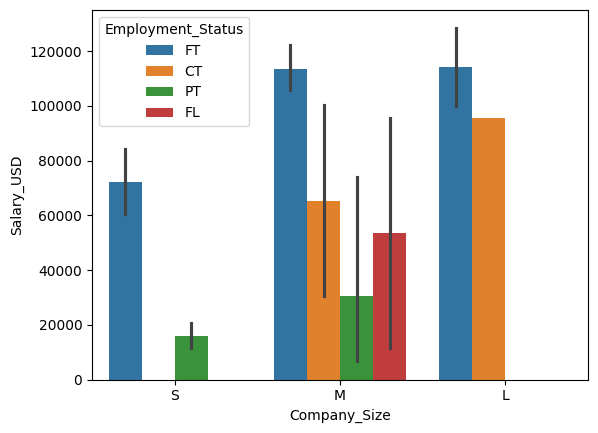

In [14]:
#1. Create a bar plot of salary versus company size, factoring in employment statusimport seaborn as sns
import matplotlib.pyplot as plt

# Create the barplot comparing "Salary_USD" by "Company_Size", factoring "Employment_Status"
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")



#2. Print either A, B, C or D as your choice for question #2
print('C')



